In [230]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import defaultdict
from statistics import mean, median

In [231]:
# https://www.kaggle.com/datasets/intrincantation/cf-userdata?resource=download&select=submissions_sample.csv
contest_path = "./data/contests"
submissions_path = "./data/submissions"

In [232]:
rating_thresholds = {
    "newbie": 1199,
    "pupil": 1399,
    "specialist": 1599,
    "expert": 1899,
    "candidate_master": 2099,
    "master": 2299,
    "int_master": 2399,
    "grandmaster": 2599,
    "int_grandmaster": 2999,
    "legendary_gm": 100000
}

In [233]:
def get_rank (rating) :
  for key in rating_thresholds:
    threshold = rating_thresholds[key]
    if threshold >= rating:
      return key      


In [234]:
delta_threshold = 100


In [235]:
rank_data = defaultdict(list)
ids_data = defaultdict(list)

for rank in rating_thresholds:
  if (rank != "legendary_gm") :
    rank_data[rank]

for filename in os.listdir(contest_path):
  file_path = os.path.join(contest_path, filename)
  df = pd.read_csv(file_path)

  flag = 0
  max_rating = 0 
  pre_time = 0
  for index, row in df.iterrows():
    new_rating = row['newRating']
    old_rating = row['oldRating']
    time = row['updateTime']
    delta = abs (new_rating - old_rating)

    if (flag == 0 and delta < delta_threshold) :
      max_rating = new_rating
      flag = 1
      pre_time = time

    if (flag and new_rating > max_rating and get_rank (max_rating) != get_rank (new_rating)) :
      time_taken = time - pre_time
      old_rank = get_rank (max_rating)
      rank_data[old_rank].append (time_taken)
      ids_data[filename].append ([old_rank, pre_time, time])
      
      max_rating = new_rating
      pre_time = time

In [236]:
for rank, data in rank_data.items():
    print(f"{rank}: {len(data)}")

newbie: 5180
pupil: 8660
specialist: 7995
expert: 4150
candidate_master: 2716
master: 1704
int_master: 1338
grandmaster: 819
int_grandmaster: 158


In [237]:
results = {}

# Iterate through the dictionary
for key, values in rank_data.items():
    values_in_days = [value / 86400 for value in values]
    
    # Calculate mean, median, max, min
    mean_val = mean(values_in_days)
    median_val = median(values_in_days)
    max_val = max(values_in_days)
    min_val = min(values_in_days)
    
    # Store results in the results dictionary
    results[key] = {
        'mean': mean_val,
        'median': median_val,
        'max': max_val,
        'min': min_val
    }

# Print results
for key, stats in results.items():
    print(f"{key}: Mean = {stats['mean']}, Median = {stats['median']}, Max = {stats['max']}, Min = {stats['min']}")

newbie: Mean = 214.09635684791934, Median = 175.01909722222223, Max = 1930.9479166666667, Min = 0.09375
pupil: Mean = 195.2176441814216, Median = 136.01736111111111, Max = 2378.9166666666665, Min = 0.7708333333333334
specialist: Mean = 210.37382652352164, Median = 117.98958333333333, Max = 4616.159722222223, Min = 0.09375
expert: Mean = 256.9436387215529, Median = 171.00520833333331, Max = 3665.9826388888887, Min = 0.09375
candidate_master: Mean = 232.74607981508754, Median = 147.01041666666666, Max = 2513.0868055555557, Min = 0.6666666666666666
master: Mean = 325.16583488197705, Median = 237.01041666666669, Max = 3239.9930555555557, Min = 0.09375
int_master: Mean = 181.2463985426009, Median = 99.14583333333333, Max = 2361.9895833333335, Min = 0.6666666666666666
grandmaster: Mean = 364.4499185999186, Median = 250.98263888888889, Max = 3296.8993055555557, Min = 1.9375
int_grandmaster: Mean = 634.9023602320675, Median = 477.0, Max = 3129.3576388888887, Min = 1.125


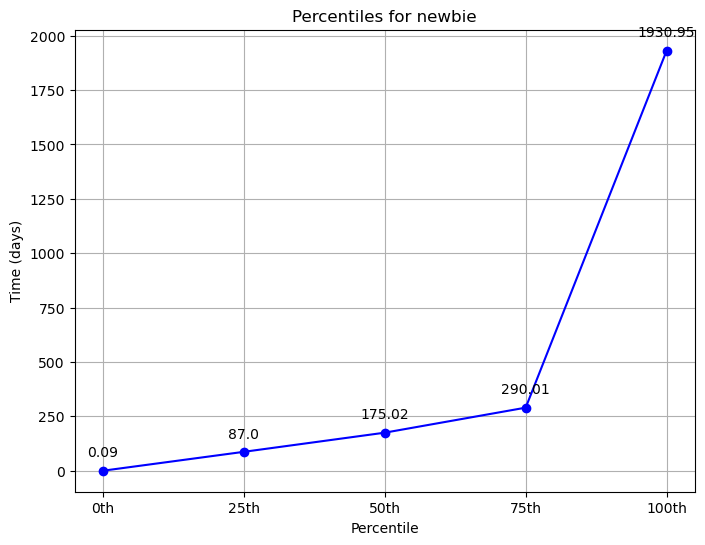

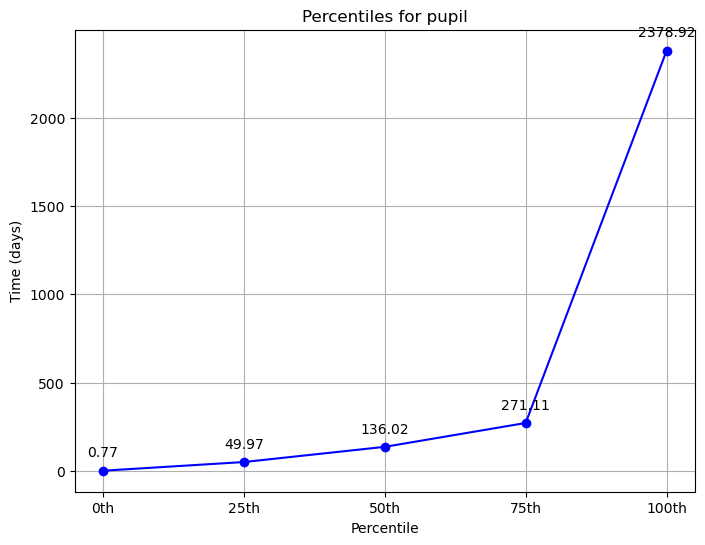

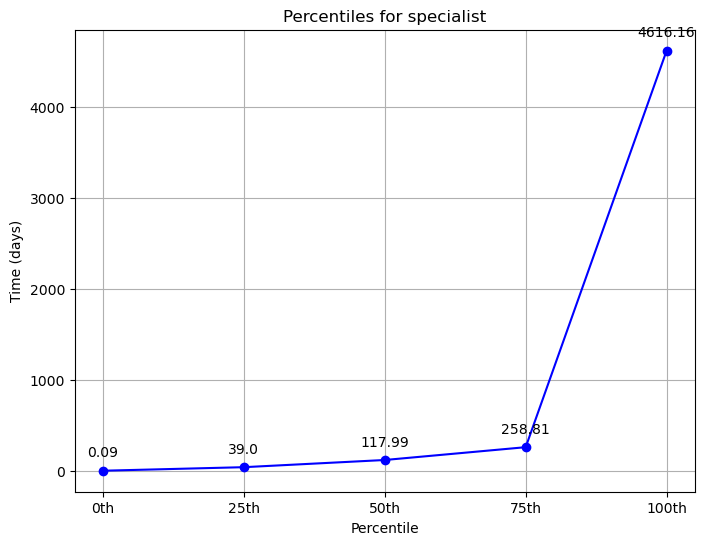

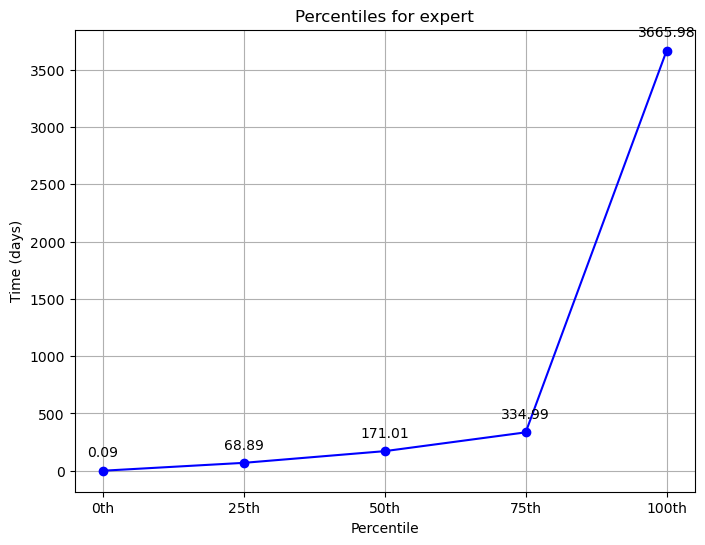

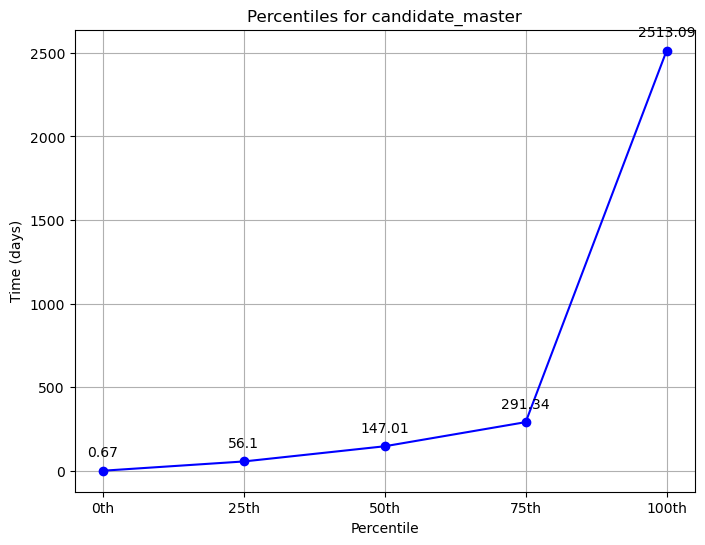

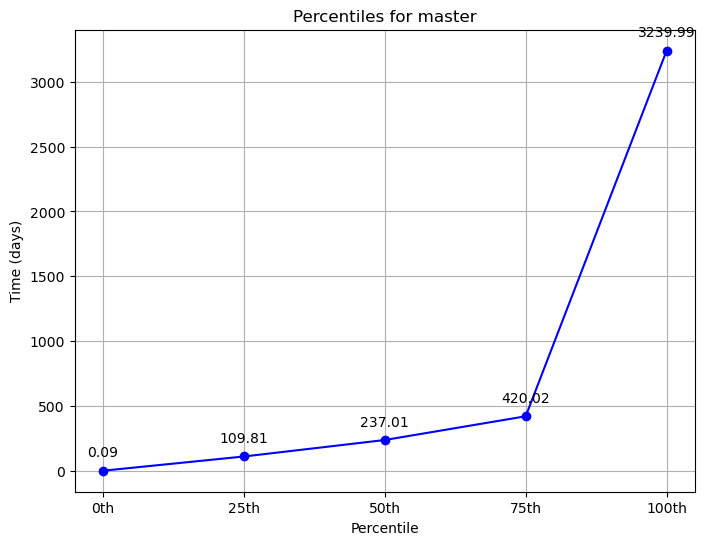

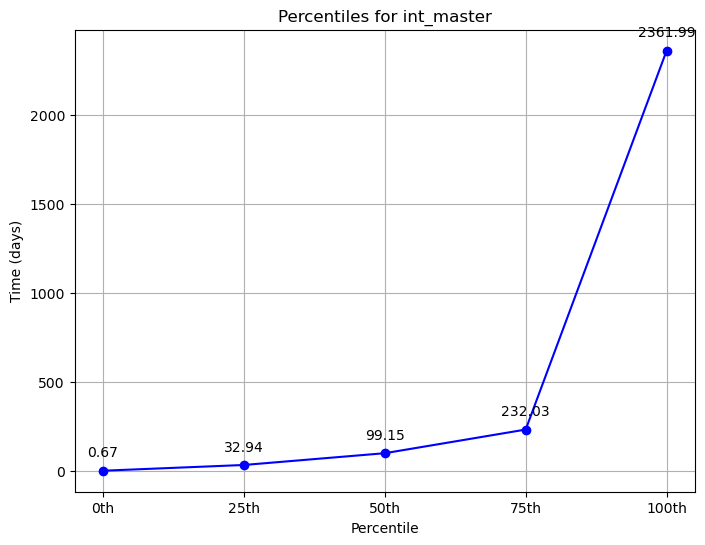

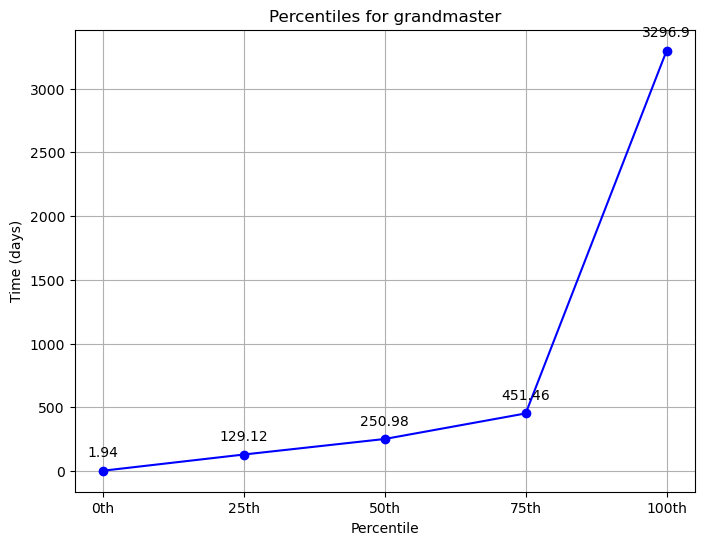

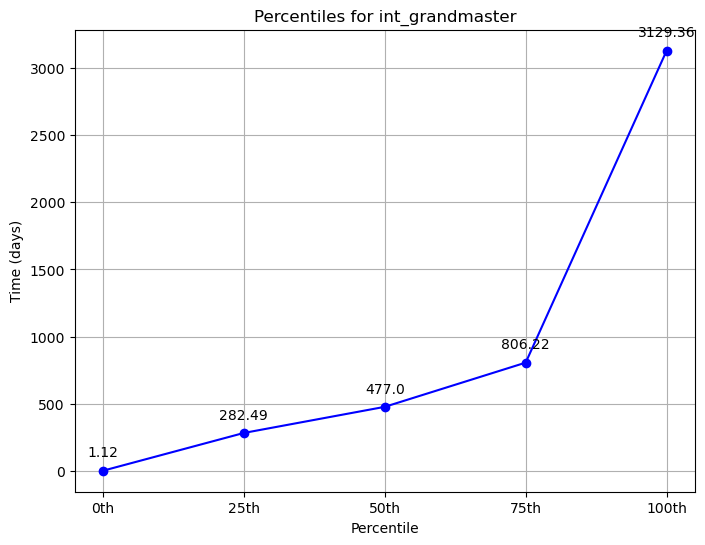

In [256]:
def calculate_percentiles(values):
    percentiles = np.percentile(values, [0, 25, 50, 75, 100])
    return percentiles

# Plot percentiles for each key
for key, values in rank_data.items():
    # Convert values from seconds to days
    values_in_days = np.array(values) / 86400
    
    # # Calculate percentiles
    percentiles = calculate_percentiles(values_in_days)
    percentile_values = [0, 25, 50, 75, 100]
    
    # Plot percentiles
    plt.figure(figsize=(8, 6))
    plt.plot(percentile_values, percentiles, marker='o', linestyle='-', color='b')
    plt.title(f'Percentiles for {key}')
    plt.xlabel('Percentile')
    plt.ylabel('Time (days)')
    plt.grid(True)
    plt.xticks(percentile_values, ['0th', '25th', '50th', '75th', '100th'])
    
    # Display the correct y-axis values for each percentile
    for i, txt in enumerate(percentiles):
        plt.annotate(f'{round(txt, 2)}', (percentile_values[i], percentiles[i]), textcoords="offset points", xytext=(0,10), ha='center')
    
    plt.show()

In [251]:
problems_data = defaultdict(list)

for rank in rating_thresholds:
  if (rank != "legendary_gm") :
    problems_data[rank]

for username, item in ids_data.items():
  file_path = os.path.join(submissions_path, username)
  df = pd.read_csv(file_path)

  # for item in data :
  #   count = 0
  #   for index, row in df.iterrows():
  #     time = row["creationTime"]
  #     status = row["verdict"]
      
  #     if (time >= item[1] and time <= item[2] and status == "OK") :
  #       count += 1
      
  #   problems_data[item[0]].append (count)
  count = 0
  idx = 0
  for index, row in df.iterrows() :
    time = row["creationTime"]
    status = row["verdict"]
    
    if (time > item[idx][2]) :
      problems_data[item[idx][0]].append (count)
      count = 0
      idx += 1

    if (idx == len (item)) :
      break
    
    if (time >= item[idx][1] and time <= item[idx][2] and status == "OK") :
      count += 1
    
  
  if (idx < len (item)) :
    problems_data[item[idx][0]].append (count)
    

In [252]:
results2 = {}

# Iterate through the dictionary
for key, values in problems_data.items():
    # Calculate mean, median, max, min
    mean_val = mean(values)
    median_val = median(values)
    max_val = max(values)
    min_val = min(values)
    
    # Store results in the results dictionary
    results[key] = {
        'mean': mean_val,
        'median': median_val,
        'max': max_val,
        'min': min_val
    }

# Print results
for key, stats in results.items():
    print(f"{key}: Mean = {stats['mean']}, Median = {stats['median']}, Max = {stats['max']}, Min = {stats['min']}")

newbie: Mean = 171.89729729729729, Median = 116.0, Max = 1651, Min = 0
pupil: Mean = 144.7867205542725, Median = 80.0, Max = 2480, Min = 0
specialist: Mean = 127.48730456535334, Median = 62, Max = 2076, Min = 0
expert: Mean = 174.98048192771085, Median = 89.0, Max = 2842, Min = 0
candidate_master: Mean = 155.75147275405007, Median = 79.5, Max = 1813, Min = 0
master: Mean = 219.0968309859155, Median = 120.0, Max = 2231, Min = 0
int_master: Mean = 117.6898355754858, Median = 45.0, Max = 3404, Min = 0
grandmaster: Mean = 238.45787545787545, Median = 147, Max = 2887, Min = 3
int_grandmaster: Mean = 450.84177215189874, Median = 278.0, Max = 3915, Min = 6


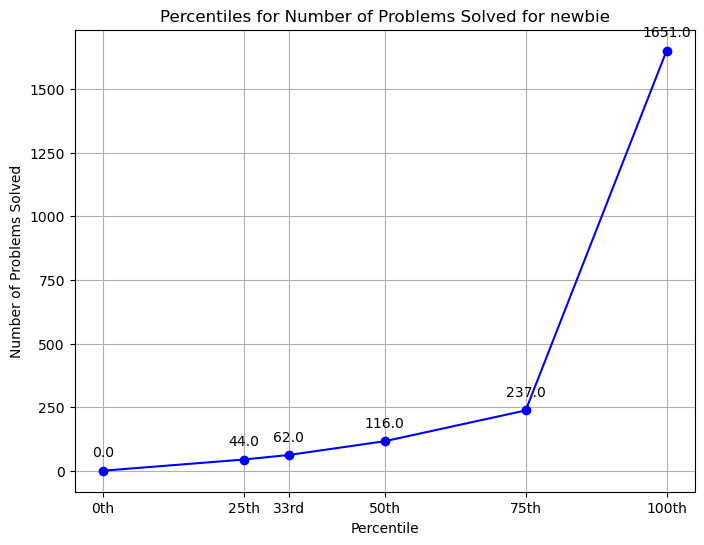

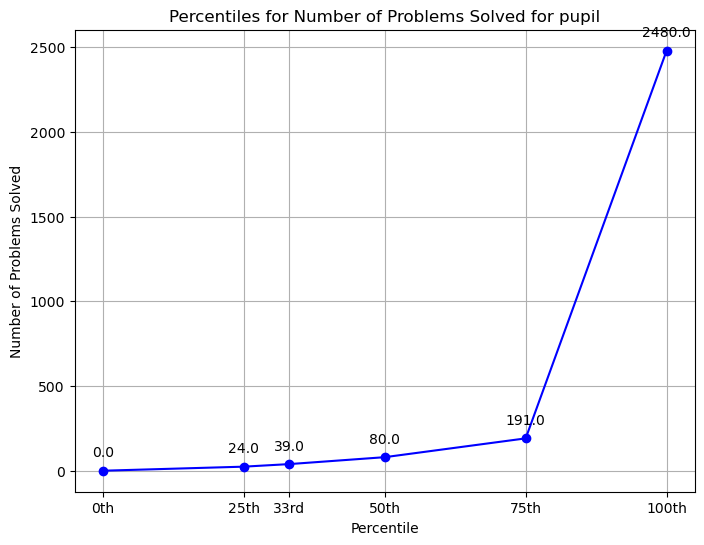

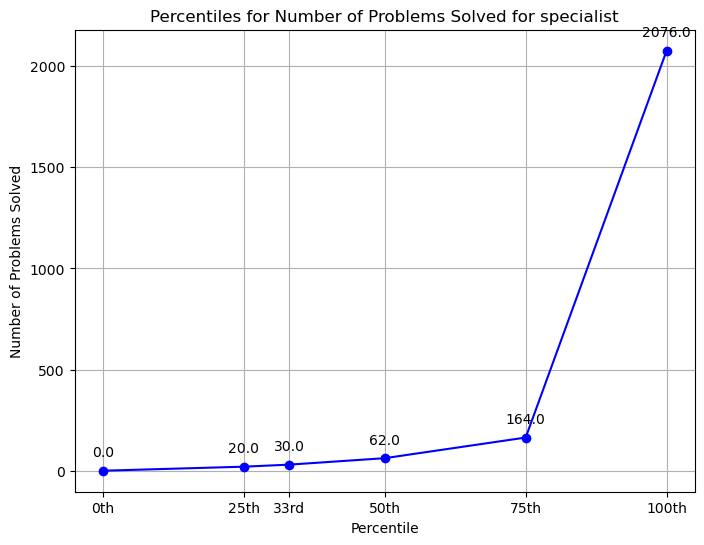

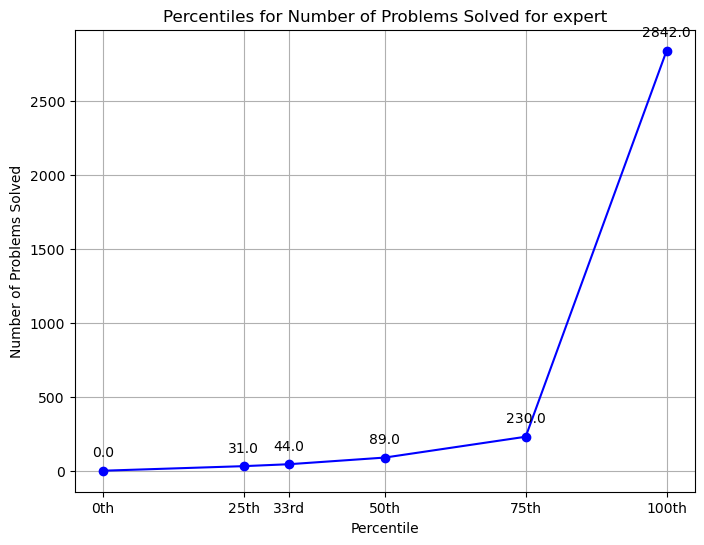

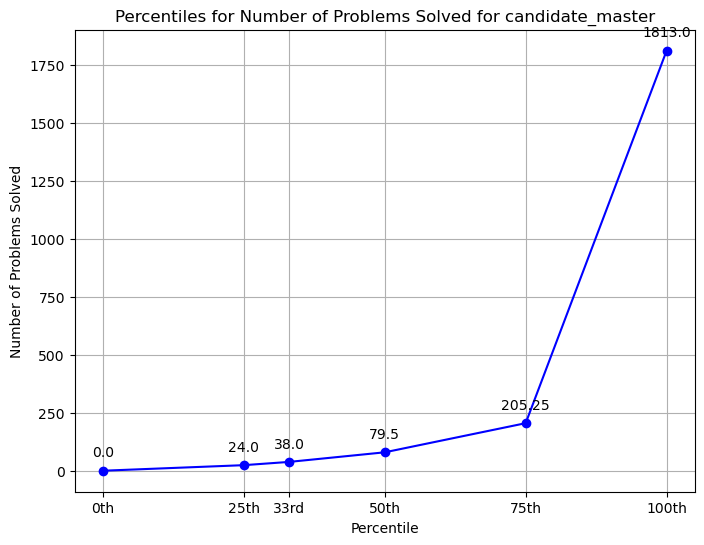

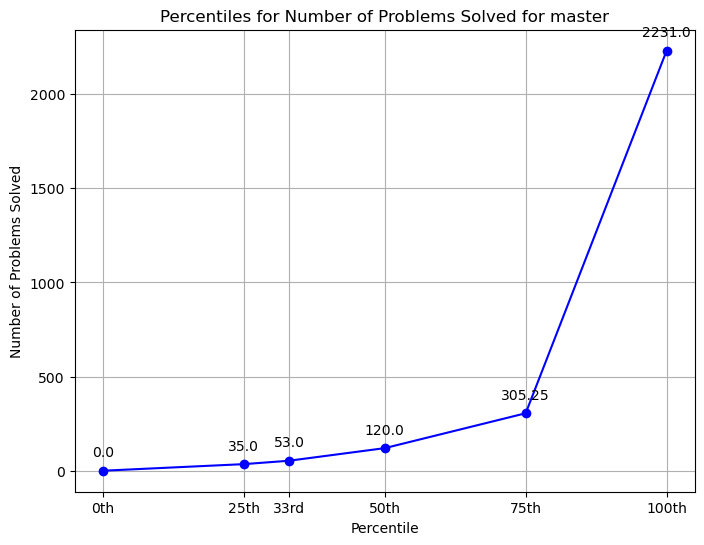

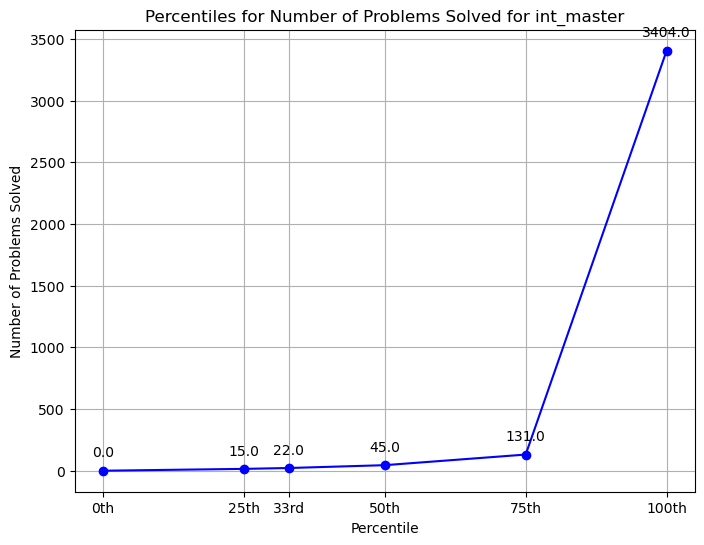

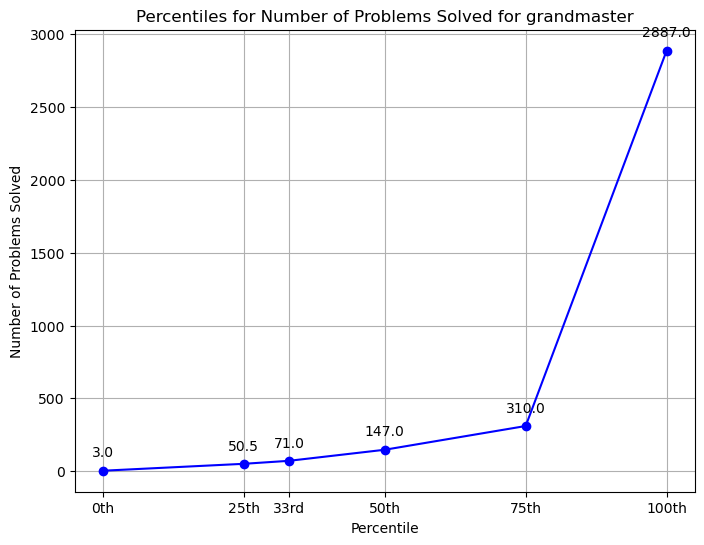

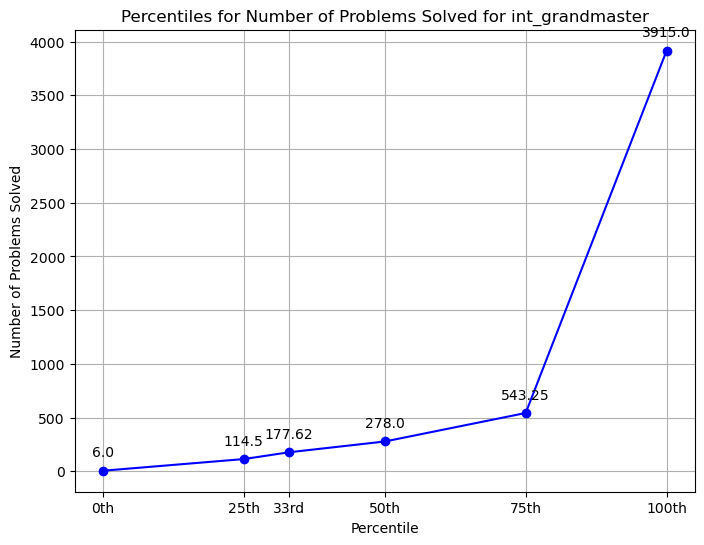

In [258]:
def calculate_percentiles(values):
    percentiles = np.percentile(values, [0, 25, 33, 50, 75, 100])
    return percentiles

# Plot percentiles for each key in problems_data
for key, values in problems_data.items():
    # Calculate percentiles
    percentiles = calculate_percentiles(values)
    percentile_values = [0, 25, 33, 50, 75, 100]
    
    # Plot percentiles
    plt.figure(figsize=(8, 6))
    plt.plot(percentile_values, percentiles, marker='o', linestyle='-', color='b')
    plt.title(f'Percentiles for Number of Problems Solved for {key}')
    plt.xlabel('Percentile')
    plt.ylabel('Number of Problems Solved')
    plt.grid(True)
    plt.xticks(percentile_values, ['0th', '25th', '33rd', '50th', '75th', '100th'])
    
    # Display the correct y-axis values for each percentile
    for i, txt in enumerate(percentiles):
        plt.annotate(f'{round(txt, 2)}', (percentile_values[i], percentiles[i]), textcoords="offset points", xytext=(0,10), ha='center')
    
    plt.show()
